In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [2]:
# read data
data = pd.read_csv("CA.csv")
#print(data)
year1 = data[['Year']][:44]
#print(year1.shape)
year2 = data[['Year']][-11:]

In [3]:
# Split data for train and test
all_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][0:55]
all_y = data[['HYTCP']][0:55]
train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)
print(test_x.shape)
print(train_x.shape)
print(test_y.shape)
print(train_y.shape)
print(year1.shape)
print(year2.shape)

(11, 10)
(44, 10)
(11, 1)
(44, 1)
(44, 1)
(11, 1)


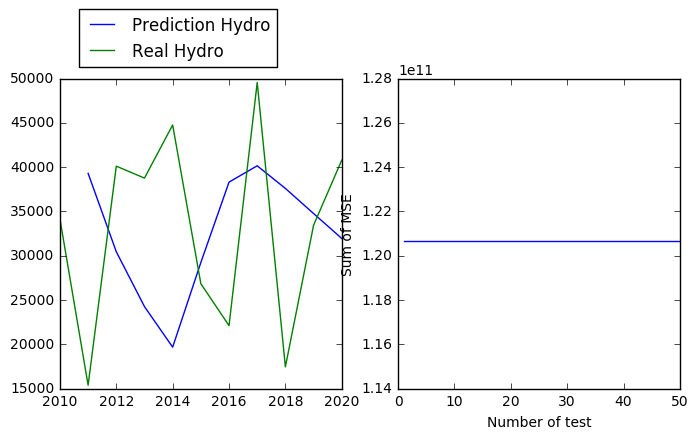

In [4]:
# Ridge regression
# let other features be predictors X, hydro be Y

# do ridge regression on train data
regr2 = linear_model.Ridge(alpha = 0.75)
regr2.fit(train_x, train_y)

# plot prediction for last 10 yrs with test_x
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(data[['Year']][-10:], regr2.predict(data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][-10:]), linewidth = 1)
# plot real data
plt.plot(year2, test_y)
# legend
plt.legend(['Prediction Hydro', 'Real Hydro'], bbox_to_anchor=(0.8, 1.25))

# Plot for MSE
err = 0
err_list = []
for i in range(1, 51):
    pred_y = regr2.predict(data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][-11:])
    err_test = np.sum((pred_y - test_y)**2)
    err += err_test
    #avg = err / i
    err_list.append(err)
year_list = np.linspace(1, 50, 50)  
plt.subplot(122)
plt.plot(year_list, err_list)
plt.xlabel('Number of test')
plt.ylabel('Sum of MSE')

plt.show()

In [5]:
# predict Hydro for future
year3 = year2 = data[['Year']][-6:]
year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
print(year3)
future_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][-6:]
pred = pd.DataFrame(regr2.predict(future_x))
pred.columns = ['Hydro']
print(pred)
future = pd.concat([year3, pred], axis=1)
print(future)

     Year
0  2015.0
1  2016.0
2  2017.0
3  2018.0
4  2019.0
5  2020.0
          Hydro
0  29223.516069
1  38298.553575
2  40144.390753
3  37590.190669
4  34755.479923
5  31942.811158
     Year         Hydro
0  2015.0  29223.516069
1  2016.0  38298.553575
2  2017.0  40144.390753
3  2018.0  37590.190669
4  2019.0  34755.479923
5  2020.0  31942.811158


In [6]:
# put code together for looping all states
import os

directory = os.path.join("..","path")
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".csv"):
           f=open(file, 'r')
           print(file.name)
           f.close()

In [8]:
statelist=["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
print(len(statelist))

future = year3
# do ridge regression on train data

for i in range(49):
    data = pd.read_csv('%s.csv' % (statelist[i]))
    
    year1 = data[['Year']][:44]
    #print(year1.shape)
    year2 = data[['Year']][-11:]
    # Split data for train and test
    #print(i)
    all_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][0:55]
    all_y = data[['HYTCP']][0:55]
    train_x, test_x, train_y, test_y = train_test_split(all_x, all_y, test_size=0.2)
    regr2 = linear_model.Ridge(alpha = 0.75)
    regr2.fit(train_x, train_y)
    # predict Hydro for future
    #year3 = data[['Year']][-6:]
    #year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
    #print(year3)
    future_x = data[['GDP','CLPRB','EMFDB','ENPRP','NGMPB','PAPRB','PCP','ZNDX','Nominal Price', 'Inflation Adjusted Price']][-6:]
    pred = pd.DataFrame(regr2.predict(future_x).clip(min=0))
    pred.columns = [statelist[i]]
    #print(pred)
    future = pd.concat([future, pred], axis=1)
    #print(future)
print(future)

# output to csv
future.to_csv('HydroPreds.csv', encoding='utf-8', index=False)


49
     Year           AK            AL           AR           AZ            CA  \
0  2015.0  1530.600430  10873.231288  2787.434197  7151.173015  27433.387251   
1  2016.0  1568.241238   8151.294734  1317.800767  5772.121697  35877.820708   
2  2017.0  1594.179884   9881.619400   237.035413  4528.935125  37564.060147   
3  2018.0  1619.757981  10072.805593     0.000000  3198.198744  35110.462185   
4  2019.0  1651.769342  10400.191048     0.000000  1567.614985  32503.255386   
5  2020.0  1678.549430  10215.328304     0.000000     0.000000  29832.331316   

           CO          CT   DE          FL     ...                SD  \
0  752.778531  316.841525  0.0  167.170233     ...       6502.827798   
1  677.413155  318.267056  0.0  179.809470     ...       6752.967466   
2  732.805074  435.826774  0.0  179.069552     ...       7388.779797   
3  773.647833  422.338675  0.0  173.543071     ...       6853.823925   
4  750.690282  447.467041  0.0  174.540752     ...       6561.871747   
5  7